# Meditopia (TR - US) App Store

# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
import math
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect_langs

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/delaldeniztomruk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Understanding the Data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/delaltomruk/meditation-proj/main/data/appstore_meditopia.csv?token=APZEDM4F5MVSPYFSWWJLUZ3ALBVYA")
df.head()

,Unnamed: 0,date,rating,review,developerResponse.body
0,0,2020-07-07 22:44:10,5,"I had a wonderful 2018, but mid 2019 my world ...","Hello, we are all in a very chaotic time with ..."
1,1,2020-07-09 10:01:22,5,This app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin..."
2,2,2020-06-17 03:15:08,5,Never in 1 million years did I think I would m...,What a profound comment! We don't always have ...
3,3,2020-08-02 13:45:00,5,I’ve used three or four of the other popular m...,"Hello Ernie, thank you so much for this uplift..."
4,4,2020-03-03 12:07:14,5,I work night shift and on my days off it’s ver...,"Hello, it is great to hear that you liked Medi..."


In [5]:
# unnamed is just a duplicate of the index
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    236 non-null    object
 1   rating                  236 non-null    int64 
 2   review                  236 non-null    object
 3   developerResponse.body  193 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.5+ KB


In [7]:
df.describe()

,rating
count,236.000000
mean,4.419492
std,1.326442
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
# look at the dates separately
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df = df.drop(columns=["date"])
df.head()

,rating,review,developerResponse.body,year,month,day
0,5,"I had a wonderful 2018, but mid 2019 my world ...","Hello, we are all in a very chaotic time with ...",2020,7,7
1,5,This app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin...",2020,7,9
2,5,Never in 1 million years did I think I would m...,What a profound comment! We don't always have ...,2020,6,17
3,5,I’ve used three or four of the other popular m...,"Hello Ernie, thank you so much for this uplift...",2020,8,2
4,5,I work night shift and on my days off it’s ver...,"Hello, it is great to hear that you liked Medi...",2020,3,3


In [9]:
df = df.rename(columns={'developerResponse.body': "meditopia response"})
df.head()

,rating,review,meditopia response,year,month,day
0,5,"I had a wonderful 2018, but mid 2019 my world ...","Hello, we are all in a very chaotic time with ...",2020,7,7
1,5,This app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin...",2020,7,9
2,5,Never in 1 million years did I think I would m...,What a profound comment! We don't always have ...,2020,6,17
3,5,I’ve used three or four of the other popular m...,"Hello Ernie, thank you so much for this uplift...",2020,8,2
4,5,I work night shift and on my days off it’s ver...,"Hello, it is great to hear that you liked Medi...",2020,3,3


In [10]:
from nltk import word_tokenize
word_token = [word_tokenize(review) for review in df.review]
len_tokens= [] 

for i in range(len(word_token)):
    len_tokens.append(len(word_token[i]))

df["n_tokens"] = len_tokens
df.head()

,rating,review,meditopia response,year,month,day,n_tokens
0,5,"I had a wonderful 2018, but mid 2019 my world ...","Hello, we are all in a very chaotic time with ...",2020,7,7,174
1,5,This app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin...",2020,7,9,169
2,5,Never in 1 million years did I think I would m...,What a profound comment! We don't always have ...,2020,6,17,145
3,5,I’ve used three or four of the other popular m...,"Hello Ernie, thank you so much for this uplift...",2020,8,2,220
4,5,I work night shift and on my days off it’s ver...,"Hello, it is great to hear that you liked Medi...",2020,3,3,116


## Analyzing MultiLingual Data

In [11]:
df.tail()

,rating,review,meditopia response,year,month,day,n_tokens
231,1,So I downloaded this and it was a SEVEN day FR...,"Hello, sorry for your situation. Payments are ...",2019,7,26,73
232,5,"So well done, I couldn’t sleep then I was in Y...",So great to see your comment :) Thanks for sha...,2019,5,9,33
233,5,I was agitated and felt frustration creeping u...,NaN,2021,3,3,29
234,1,"Be careful with this APP, after using it for a...",Being aware and being careful are two of the g...,2019,2,9,88
235,1,5 yıldız verenlerin hepsi komisyon alıyor sanı...,NaN,2017,2,9,50


As it can be seen in line 235, there are also some non-English tweets. Let's identify them.

In [12]:
lang = [detect_langs(i) for i in df.review]

In [13]:
language = [str(i).split(":")[0][1:] for i in lang]

In [14]:
df["lang"] = language

In [15]:
df

,rating,review,meditopia response,year,month,day,n_tokens,lang
0,5,"I had a wonderful 2018, but mid 2019 my world ...","Hello, we are all in a very chaotic time with ...",2020,7,7,174,en
1,5,This app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin...",2020,7,9,169,en
2,5,Never in 1 million years did I think I would m...,What a profound comment! We don't always have ...,2020,6,17,145,en
3,5,I’ve used three or four of the other popular m...,"Hello Ernie, thank you so much for this uplift...",2020,8,2,220,en
4,5,I work night shift and on my days off it’s ver...,"Hello, it is great to hear that you liked Medi...",2020,3,3,116,en
...,...,...,...,...,...,...,...,...
231,1,So I downloaded this and it was a SEVEN day FR...,"Hello, sorry for your situation. Payments are ...",2019,7,26,73,en
232,5,"So well done, I couldn’t sleep then I was in Y...",So great to see your comment :) Thanks for sha...,2019,5,9,33,en
233,5,I was agitated and felt frustration creeping u...,NaN,2021,3,3,29,en
234,1,"Be careful with this APP, after using it for a...",Being aware and being careful are two of the g...,2019,2,9,88,en


There are some errors but removing all non-english tweets will reduce 86 rows.

In [16]:
(len(df) - len(df[df["lang"] == "en"])) / len(df)

0.3771186440677966

In [17]:
fix = df[df["lang"] != "en"]

In [18]:
fix.rating.mean()

4.775280898876405

In [19]:
# correcting some wrong lang classification
df.loc[89, "lang"] = "en"
df.loc[90, "lang"] = "en"
df.loc[131, "lang"] = "en"
df.loc[132, "lang"] = "en"
df.loc[141, "lang"] = "en"

In [20]:
df.groupby(by="lang").mean()

,rating,year,month,day,n_tokens
lang,,,,,
ca,5.000000,2020.000000,6.500000,15.500000,6.500000
en,4.225166,2019.735099,5.437086,16.695364,40.238411
es,4.904762,2019.682540,6.206349,17.365079,22.253968
fi,5.000000,2019.000000,2.000000,16.000000,1.000000
fr,5.000000,2020.000000,3.000000,31.000000,4.000000
id,5.000000,2019.000000,2.000000,16.000000,2.000000
pt,4.833333,2019.833333,3.333333,11.666667,11.333333
ru,4.600000,2020.000000,7.800000,10.400000,19.200000
tl,5.000000,2019.000000,7.000000,3.000000,3.000000


### Correlation

In [21]:
# see if there is a correlation on the numeric data
correlation = df.corr()
correlation

,rating,year,month,day,n_tokens
rating,1.000000,0.076995,-0.042329,-0.045868,-0.232417
year,0.076995,1.000000,-0.230126,-0.036212,0.031549
month,-0.042329,-0.230126,1.000000,0.010710,-0.028973
day,-0.045868,-0.036212,0.010710,1.000000,-0.068796
n_tokens,-0.232417,0.031549,-0.028973,-0.068796,1.000000


In [22]:
df["year"].min()

2017

In [23]:
df["year"].max()

2021

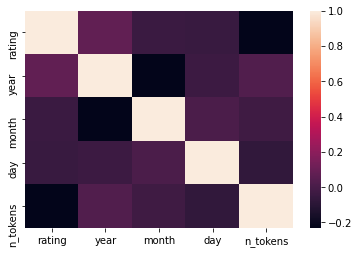

In [24]:
# visualize (there is no correlation)
sns.heatmap(correlation)
plt.show()

## Data Visualization

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating              236 non-null    int64 
 1   review              236 non-null    object
 2   meditopia response  193 non-null    object
 3   year                236 non-null    int64 
 4   month               236 non-null    int64 
 5   day                 236 non-null    int64 
 6   n_tokens            236 non-null    int64 
 7   lang                236 non-null    object
dtypes: int64(5), object(3)
memory usage: 14.9+ KB


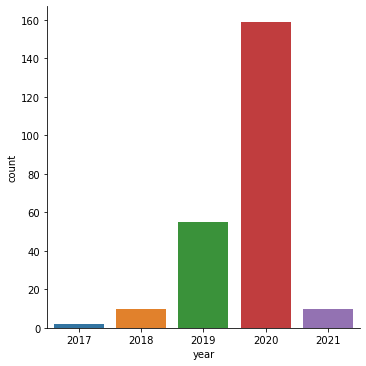

In [26]:
sns.catplot(x="year",data=df,kind="count")
plt.show()

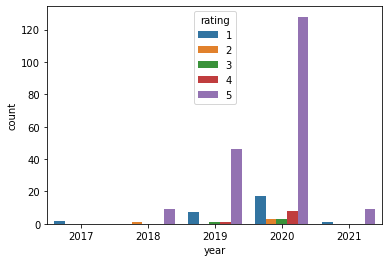

In [27]:
sns.countplot(x="year", data=df, hue="rating");

In [28]:
df.columns

Index(['rating', 'review', 'meditopia response', 'year', 'month', 'day',
       'n_tokens', 'lang'],
      dtype='object')

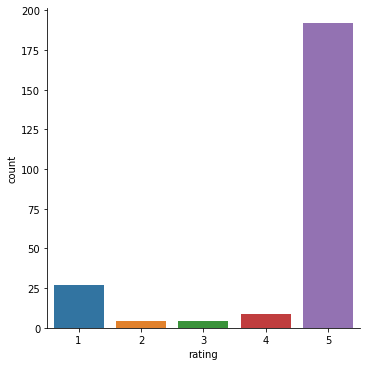

In [29]:
sns.catplot(x="rating",data=df,kind="count")
plt.show()

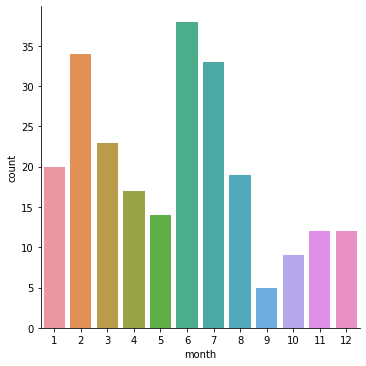

In [30]:
sns.catplot(x="month",data=df,kind="count")
plt.show()

# Analysing Reviews

In [31]:
df['review'] = df['review'].str.replace('[^\w\s]','')
df['review'] = df['review'].str.lower()
df.head()

,rating,review,meditopia response,year,month,day,n_tokens,lang
0,5,i had a wonderful 2018 but mid 2019 my world s...,"Hello, we are all in a very chaotic time with ...",2020,7,7,174,en
1,5,this app has brought a new meaning of gratitud...,"Hello, thank you so much for profoundly sharin...",2020,7,9,169,en
2,5,never in 1 million years did i think i would m...,What a profound comment! We don't always have ...,2020,6,17,145,en
3,5,ive used three or four of the other popular me...,"Hello Ernie, thank you so much for this uplift...",2020,8,2,220,en
4,5,i work night shift and on my days off its very...,"Hello, it is great to hear that you liked Medi...",2020,3,3,116,en


In [32]:
df.isna().sum()

rating                 0
review                 0
meditopia response    43
year                   0
month                  0
day                    0
n_tokens               0
lang                   0
dtype: int64

Calm hasn't responded some of the reviews. Check if there is a relation between comments Calm answered and ratings.

## Word Cloud

I will only check English tweets.

In [33]:
df_1 = df[(df["rating"] == 1) & (df["lang"] == "en")]
df_2 = df[(df["rating"] == 2) & (df["lang"] == "en")]
df_3 = df[(df["rating"] == 3) & (df["lang"] == "en")]
df_4 = df[(df["rating"] == 4) & (df["lang"] == "en")]
df_5 = df[(df["rating"] == 5) & (df["lang"] == "en")]

In [34]:
text_1 = " ".join(review for review in df_1.review)
text_2 = " ".join(review for review in df_2.review)
text_3 = " ".join(review for review in df_3.review)
text_4 = " ".join(review for review in df_4.review)
text_5 = " ".join(review for review in df_5.review)

In [35]:
stopwords = set(STOPWORDS)
stopwords.update(["meditation", "app", "meditate", "im", "meditations" ,"thing"])

cloud_1 = WordCloud(stopwords=stopwords, background_color="white").generate(text_1)
cloud_2 = WordCloud(stopwords=stopwords, background_color="white").generate(text_2)
cloud_3 = WordCloud(stopwords=stopwords, background_color="white").generate(text_3)
cloud_4 = WordCloud(stopwords=stopwords, background_color="white").generate(text_4)
cloud_5 = WordCloud(stopwords=stopwords, background_color="white").generate(text_5)

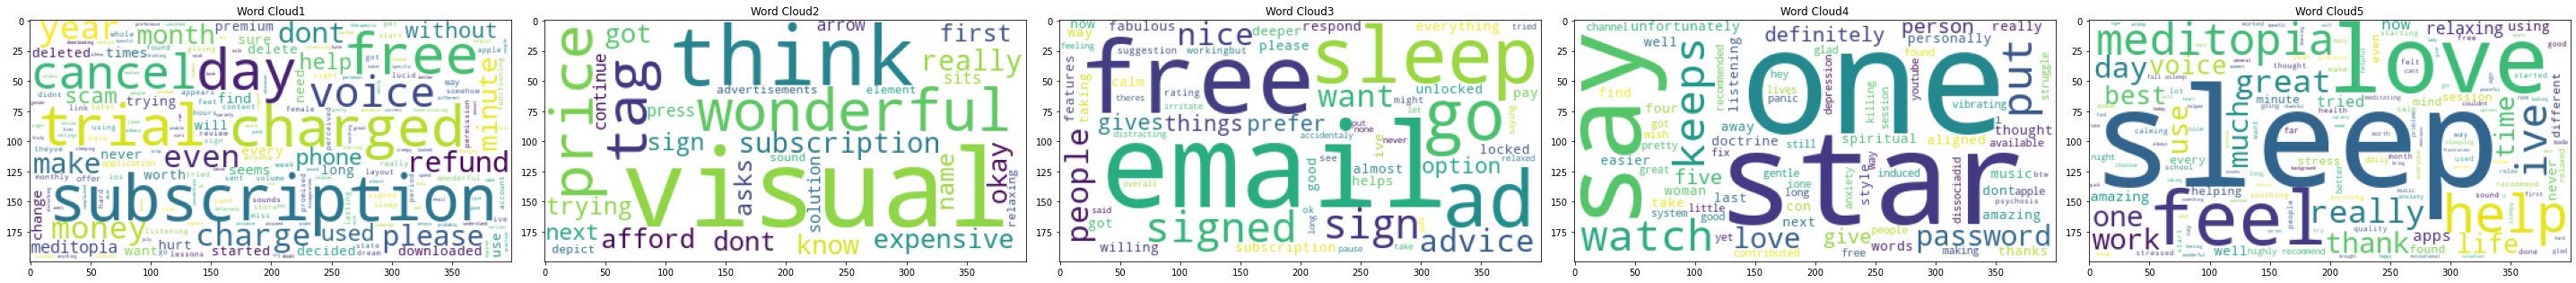

In [36]:
width=5
height=5
rows = 1
cols = 5
axes=[]
fig=plt.figure(figsize=(40, 40))

for a in range(rows*cols):
    cloud = [cloud_1, cloud_2, cloud_3, cloud_4, cloud_5]
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Word Cloud"+str(a + 1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cloud[a])
fig.tight_layout()    
plt.show()

## Implementing TF-IDF

In [37]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(df_1.review)
X = vect.transform(df_1.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,cancel,charged,day,even,free,money,please,subscription,trial,year
0,0.000000,0.000000,0.000000,0.894427,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000
1,0.000000,0.302577,0.400608,0.000000,0.285919,0.686527,0.000000,0.000000,0.302577,0.321462
2,0.224635,0.211438,0.000000,0.000000,0.199798,0.000000,0.239870,0.898541,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.419441,0.789599,0.000000,0.000000,0.000000,0.000000,0.447887,0.000000,0.000000,0.000000


In [38]:
len(df_1.index)

24

In [39]:
stopwords.update(["really"])
vect = TfidfVectorizer(max_features = 15, stop_words=stopwords)
tfIdf = vect.fit(df_2.review)
X = vect.transform(df_2.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,advertisements,okay,press,price,relaxing,sign,sits,solution,sound,subscription,tag,think,trying,visual,visuals
0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.000000,0.000000,0.000000
1,0.000000,0.408248,0.408248,0.0,0.000000,0.408248,0.408248,0.408248,0.000000,0.0,0.0,0.0,0.408248,0.000000,0.000000
2,0.447214,0.000000,0.000000,0.0,0.447214,0.000000,0.000000,0.000000,0.447214,0.0,0.0,0.0,0.000000,0.447214,0.447214


In [40]:
len(df_2.index)

3

In [41]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-41-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [42]:
print(df_2[df_2['review'].str.contains("press")]["review"])

117    okay so i got the app and im trying to sign up but the first thing it asks is my name than the next thing is the same thing and when i press the arrow to continue it just sits there is there a solution to this
Name: review, dtype: object


In [43]:
len(df_3.index)

3

In [44]:
vect = TfidfVectorizer(max_features = 15, stop_words=stopwords)
tfIdf = vect.fit(df_3.review)
X = vect.transform(df_3.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,email,free,go,pause,pay,people,please,put,rating,respond,said,saying,sign,signed,sleep
0,0.00000,0.485071,0.485071,0.0,0.242536,0.242536,0.242536,0.000000,0.242536,0.242536,0.000000,0.000000,0.000000,0.000000,0.485071
1,0.67082,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.223607,0.000000,0.000000,0.223607,0.223607,0.447214,0.447214,0.000000
2,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
len(df_4.index)

6

In [46]:
vect = TfidfVectorizer(max_features = 15, stop_words=stopwords)
tfIdf = vect.fit(df_4.review)
X = vect.transform(df_4.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aligned,keeps,love,next,one,panic,password,person,pretty,psychosis,put,recommended,say,stars,watch
0,0.000000,0.000000,0.000000,0.000000,0.591421,0.0,0.000000,0.360616,0.0,0.0,0.000000,0.0,0.000000,0.721233,0.000000
1,0.387131,0.000000,0.000000,0.387131,0.317453,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.774262,0.000000,0.000000
2,0.000000,0.489813,0.200827,0.000000,0.000000,0.0,0.489813,0.000000,0.0,0.0,0.489813,0.0,0.000000,0.000000,0.489813
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [47]:
len(df_5.index)

115

In [48]:
vect = TfidfVectorizer(max_features = 15, stop_words=stopwords)
tfIdf = vect.fit(df_5.review)
X = vect.transform(df_5.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,best,day,feel,great,helps,ive,life,love,meditopia,much,recommend,relaxing,sleep,thank,use
0,0.000000,0.000000,0.456097,0.0,0.0,0.000000,0.536838,0.0,0.000000,0.0,0.0,0.000000,0.464312,0.536838,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.316647,0.0,0.888081,0.0,0.0,0.000000,0.000000,0.000000,0.333236
2,0.000000,0.586892,0.000000,0.0,0.0,0.000000,0.572520,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.572520,0.000000
3,0.476125,0.476125,0.000000,0.0,0.0,0.665432,0.000000,0.0,0.217110,0.0,0.0,0.238062,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


# Sentiment Analysis

In [49]:
from textblob import TextBlob 

In [50]:
sentiment = []

for i in df.review:
    text = TextBlob(i)
    sentiment.append(text.sentiment)


In [51]:
sentiment[2]

Sentiment(polarity=0.0018827160493827143, subjectivity=0.3754320987654321)

In [52]:
sent = [float(str(i).split(",")[0].split("=")[1]) * 100 for i in sentiment]

In [53]:
df["sentiment"] = sent

In [54]:
df.head(2)

,rating,review,meditopia response,year,month,day,n_tokens,lang,sentiment
0,5,i had a wonderful 2018 but mid 2019 my world shifted dramatically and everyone knows how 2020 is going my heart aches for my old self i would cry seeing photos of me being happy because i knew i wasnt the same person i was before my passions have vanished and i felt like a shell of who i used to be i have done almost 20 meditations so far i am learning a new skill which is helping me learn how to stop my negativeanxious thoughts and stories i tell myself which never happen and i just listen to the woman talk and follow her directions in regard to where my attention should be the sleep meditations have me asleep before she gets deep into the story with is only 15 minutes long i am starting to finally feel like i am not suffocating in my life and can breathe again thank you,"Hello, we are all in a very chaotic time with a lot of uncertainty. Life is always full of ups and downs. Our feelings are temporary as everything else in life. Awareness and acceptance of this feelings may create bigger differences in ourselves than we ever expected. Reading your story was really heart-warming. Thanks for sharing with us! Best regards, Ezgi- Member Happiness",2020,7,7,174,en,17.972028
1,5,this app has brought a new meaning of gratitude i have come to a place of learning what works for my life and what does not this meditopia app has assisted me in my transition of change with a peace of mind and heart for the greater good of my sanityhealth i was once a christian who never left out of the prisms of her mind placing restrictions on god himself with religion i receive the healing the universe has to offer i have awaken my spirit to live and not suffocate and die to release negative energy and to focus on positive energy meditation through meditopia is one of gods greatest gift to regenerate our very being of existence from our head to the very souls of our feet like regenerating a cell i had forgotten the basics the simplicity of health and wellness so i encourage people to use the meditopia app,"Hello, thank you so much for profoundly sharing this amazing experience with us. That's our pleasure to accompany you in this special journey. Hope you keep meditating with us and keep sharing your precious views. Best regards, Ezgi- Member Happiness",2020,7,9,169,en,25.454545


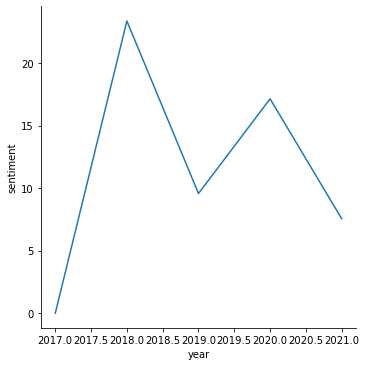

In [55]:
sns.relplot(x="year", y="sentiment", kind="line", data=df, ci=None);

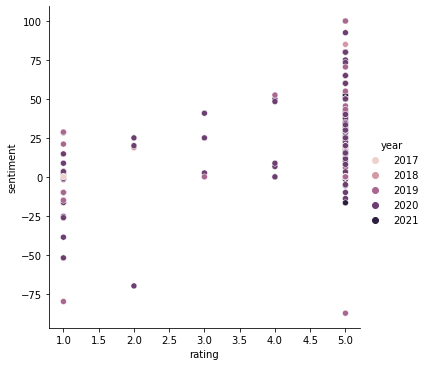

In [56]:
sns.relplot(x="rating", y="sentiment", kind="scatter", hue="year", data=df);

## Bag of Words

In [57]:
my_stopwords = ENGLISH_STOP_WORDS.union(["meditation", "app", "meditate", "im", "meditations" ,"thing"])

### Rating 1

In [58]:
len(df_1["review"])

24

In [59]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_1.review)
X = vectorizer.transform(df_1.review)

In [60]:
"""
Sparse matrix is a matrix which 
contains very few non-zero elements. When a sparse matrix is represented with a 2-dimensional array, 
we waste a lot of space to represent that matrix.
"""
X

<24x100 sparse matrix of type '<class 'numpy.int64'>'
	with 254 stored elements in Compressed Sparse Row format>

In [61]:
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names() )

In [62]:
X_df.head()

,59,5999,60,60 day,70,account,appears,apple,application,cancel,...,voice,voices,volume,want,way,week,wonderful,worth,year,year subscription
0,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,0,0,2,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_df.columns

Index(['59', '5999', '60', '60 day', '70', 'account', 'appears', 'apple',
       'application', 'cancel', 'cancel subscription', 'change', 'charge',
       'charge 5999', 'charged', 'content', 'day', 'day free',
       'day free trial', 'days', 'decided', 'delete', 'deleted', 'did',
       'didnt', 'dont', 'downloaded', 'dream', 'feet', 'feet just', 'female',
       'free', 'free trial', 'functioning', 'giving', 'got', 'hard', 'help',
       'hours', 'hurt', 'ios', 'isnt', 'ive', 'just', 'lasting', 'later',
       'layout', 'lessons', 'like', 'link', 'listening', 'long', 'make',
       'makes', 'meditopia', 'minutes', 'miss', 'money', 'month', 'monthly',
       'need', 'offer', 'perceived', 'permission', 'phone', 'premium',
       'promised', 'really', 'refund', 'right', 'scam', 'sent', 'signed',
       'sleep', 'sounds', 'start', 'started', 'state', 'store', 'subscription',
       'sure', 'theyve', 'times', 'trial', 'tried', 'trying', 'use', 'used',
       'used meditopia', 'using', '

In [64]:
print(df_1[df_1['review'].str.contains("miss")]["review"])

47     i decided to do a trial run of only 1 for a month because i was starting to love the app but after the moth expired i was charged 64 without my permission not only that but when trying to get a refund they were unable to help me i even sent them an email which they did not respond \r\ni am truly disappointed because as said before i was loving the app but it turned out being a complete money scam                                                                                                                                                                                                                                                     
227    too breathing oriented and just hard to get into not worth 5999\r\n\r\nedit i appreciate the quick response i used to be a highly functioning lucid dreamer averaged 4 times a week over half long lasting but age and medication have me at hit and miss level with less vividness and only a handful per year lasting more than a perceived 15 minu

### Rating 2

In [65]:
len(df_2.index)

3

In [66]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_2.review)
X = vectorizer.transform(df_2.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.head()

,advertisements,advertisements depict,afford,arrow,arrow continue,asks,asks press,continue,continue just,depict,...,think,think wonderful,trying,trying sign,visual,visual element,visuals,visuals visual,wonderful,wonderful price
0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
1,0,0,0,1,1,1,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,0


In [67]:
X_df.columns

Index(['advertisements', 'advertisements depict', 'afford', 'arrow',
       'arrow continue', 'asks', 'asks press', 'continue', 'continue just',
       'depict', 'depict relaxing', 'dont', 'dont know', 'element',
       'element just', 'expensive', 'expensive dont', 'got', 'got trying',
       'just', 'just sits', 'just sound', 'know', 'know afford', 'okay',
       'okay got', 'press', 'press arrow', 'price', 'price tag', 'really',
       'really expensive', 'relaxing', 'relaxing visuals', 'sign', 'sign asks',
       'sits', 'sits solution', 'solution', 'sound', 'subscription',
       'subscription really', 'tag', 'tag subscription', 'think',
       'think wonderful', 'trying', 'trying sign', 'visual', 'visual element',
       'visuals', 'visuals visual', 'wonderful', 'wonderful price'],
      dtype='object')

In [68]:
print(df_2["review"])

84     i think its wonderful but the price tag to have this subscription is really expensive dont know if i can  afford it                                                                                              
117    okay so i got the app and im trying to sign up but the first thing it asks is my name than the next thing is the same thing and when i press the arrow to continue it just sits there is there a solution to this
124    the advertisements for this app depict relaxing visuals but there is no visual element to the meditations they are just sound                                                                                    
Name: review, dtype: object


### Rating 3

In [69]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_3.review)
X = vectorizer.transform(df_3.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.head()

,48,accidentaly,accidentaly signed,ad,ad like,add,add sign,ads,ads subscription,advice,...,tried email,unlocked,unlocked fabulous,want,want free,way,way calm,willing,willing pay,workingbut
0,1,0,0,1,1,0,0,1,1,1,...,0,1,1,1,1,1,1,1,1,0
1,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_df.columns

Index(['48', 'accidentaly', 'accidentaly signed', 'ad', 'ad like', 'add',
       'add sign', 'ads', 'ads subscription', 'advice', 'advice gives', 'calm',
       'calm got', 'deeper', 'deeper features', 'did', 'did rating',
       'distracting', 'distracting theres', 'email', 'email accidentaly',
       'email just', 'email said', 'fabulous', 'fabulous helps', 'features',
       'features locked', 'feeling', 'feeling relaxed', 'free', 'helps sleep',
       'irritate', 'ive way', 'just', 'just saying', 'just sign', 'just want',
       'let', 'let distracting', 'like', 'like option', 'locked',
       'locked willing', 'long', 'long pause', 'nice', 'nice people', 'ok',
       'ok workingbut', 'option', 'option ads', 'overall', 'overall feeling',
       'pause', 'pause irritate', 'pay', 'pay good', 'people', 'people just',
       'prefer', 'prefer ad', 'rating', 'rating 48', 'relaxed', 'respond',
       'respond taking', 'said', 'said email', 'saying', 'saying add', 'sign',
       'sign jus

In [71]:
print(df_3["review"])

8     its nice but some people just want free sleep meditation or advice and this app gives those things to you but not for free i would prefer an ad then like an option to go no ads or have a subscription for more deeper features but no almost everything is locked and im not willing to pay now on to the good what is unlocked is fabulous it helps you meditate and sleep ive been way more calm since i got the app please respond by taking my suggestion if you did your rating of 48 might go up to 5
56    ok so i can see this workingbut i signed in with my email and accidentaly signed out but i tried to put in my email again and it said email take just saying they should also add a sign in and not just a sign up\r\noverall im feeling relaxed                                                                                                                                                                                                                                                             


### Rating 4

In [72]:
vectorizer = CountVectorizer(max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_4.review)
X = vectorizer.transform(df_4.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.head()

,aligned,amazing,anxiety,apple,available,away,btw,channel,contributed,definitely,...,thanks,thought,unfortunately,vibrating,watch,way,wish,woman,words,youtube
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_df.columns

Index(['aligned', 'amazing', 'anxiety', 'apple', 'available', 'away', 'btw',
       'channel', 'contributed', 'definitely', 'depression', 'did',
       'dissociadid', 'doctrine', 'does', 'dont', 'easier', 'fix', 'free',
       'gentle', 'glad', 'good', 'got', 'great', 'hey', 'induced', 'ione',
       'keeps', 'killing', 'like', 'listening', 'little', 'lives', 'long',
       'love', 'making', 'music', 'panic', 'password', 'people', 'person',
       'personally', 'pretty', 'psychosis', 'really', 'recommended', 'say',
       'session', 'spiritual', 'star', 'stars', 'struggle', 'style', 'thanks',
       'thought', 'unfortunately', 'vibrating', 'watch', 'way', 'wish',
       'woman', 'words', 'youtube'],
      dtype='object')

In [74]:
df_4

,rating,review,meditopia response,year,month,day,n_tokens,lang
22,4,i would definitely give five stars if they had more than one person do the meditations unfortunately there is only one woman who does all of them and i dont personally like her meditation style so i have to take away a star the other four stars are for the music meditations which are really amazing,"Thank you so much for this precious feedback! It's been delivered to our team. Hope you keep enjoying all the content with a loth of insight. All the best, İpek - Member Happiness",2020,11,9,61,en
25,4,i have been through some spiritual doctrine listening to these words during meditation ı can say that they were well thought and aligned only con that i can say is it can be easier to find the last meditation you did before and do the next one\r\nthanks for how you contributed to our lives in a gentle way,"Thank you so much for sharing these deep ideas with us. I hope you will keep enjoying Meditopia in your journey of self-discovery. The last meditation series we did appear on the Today page of the app. Moreover, you can check day by day your history of meditation on the Profile page, My Journey option. Wish you a great day :) All the best, İpek - Member Happiness",2020,7,3,64,en
46,4,i got this on my apple watch and it keeps making me put my password in i love the app and all but my watch keeps vibrating to put the password in you people are killing me fix your system yet it is still here,"Hello, it is great to hear that you liked Meditopia! I hope you will have very relaxing, calming, and soothing meditation experiences with a lot of insight. For your questions about the app, you can always reach us via hello@meditopia.com, we are waiting to help you! All the best, İpek - Member Happiness",2020,2,11,50,en
108,4,great app wish more free meditations were available,"Thank you so much for your comment. If you would like to try Premium account, by sharing the app with your friends, you can get 2 weeks gift Premium membership. If you need more details, you can always reach me via hello@meditopia.com Hope you enjoy! All the best, Seher - Member Happiness",2019,3,30,10,en
113,4,i love this app but ione session can be a little to long,"Hello, it is great to hear that you liked Meditopia. I hope you will have very relaxing, calming, and soothing meditation experiences with a lot of insight. If you have any questions about the app, you can always reach us via hello@meditopia.com, we are always ready to help. Hope you enjoy! All the best, İpek - Member Happiness",2020,3,23,14,en
225,4,hey found this app through the youtube channel dissociadid pretty good app and glad they recommended it i struggle with anxiety depression and panic induced psychosis btw,"Hello! We are glad that you found us! Hope you find the best meditations for yourself and feel better soon. Please reach us through hello@meditopia.com if you need any assistance about meditation or the app itself. Have an amazing day! All the best, Ezgi- Member Happiness",2020,11,19,32,en


### Rating 5

In [75]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_5.review)
X = vectorizer.transform(df_5.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.head()

,ago,amazing,anxiety,apps,asleep,awesome,background,best,better,calm,...,used,using,variety,voice,want,work,worked,works,worth,years
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,1
3,0,0,0,3,0,0,0,2,0,0,...,1,0,0,2,0,0,0,0,1,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [76]:
X_df.columns

Index(['ago', 'amazing', 'anxiety', 'apps', 'asleep', 'awesome', 'background',
       'best', 'better', 'calm', 'calming', 'choose', 'control', 'daily',
       'day', 'days', 'did', 'different', 'fall', 'fall asleep', 'far', 'feel',
       'feeling', 'felt', 'free', 'glad', 'going', 'good', 'great', 'health',
       'heart', 'help', 'helped', 'helpful', 'helping', 'helps', 'highly',
       'highly recommend', 'issues', 'ive', 'ive tried', 'just', 'life',
       'like', 'long', 'lot', 'love', 'makes', 'meditating', 'meditopia',
       'mind', 'minutes', 'moment', 'morning', 'music', 'new', 'nice', 'night',
       'ones', 'options', 'people', 'pick', 'practice', 'quality', 'really',
       'really helps', 'recommend', 'relax', 'relaxed', 'relaxing', 'say',
       'school', 'session', 'sleep', 'sleeping', 'sleepy', 'soothing',
       'sounds', 'special', 'start', 'started', 'starting', 'stress',
       'stressed', 'taking', 'thank', 'time', 'tried', 'try', 'use', 'used',
       'using', '

In [77]:
print(df_5[df_5['review'].str.contains("meditopia")]["review"])

1      this app has brought a new meaning of gratitude i have come to a place of learning what works for my life and what does not this meditopia app has assisted me in my transition of change with a peace of mind and heart for the greater good of my sanityhealth i was once a christian who never left out of the prisms of her mind placing restrictions on god himself with religion i receive the healing the universe has to offer i have awaken my spirit to live and not suffocate and die to release negative energy and to focus on positive energy meditation through meditopia is one of gods greatest gift to  regenerate our very being of existence from our head to the very souls of our feet like regenerating a cell i had forgotten the basics the simplicity of health and wellness so i encourage people to use the meditopia app                                                                                                                                                                            

## Stemming and Lemmatization

In [78]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [79]:
porter = PorterStemmer()
WNLemmatizer = WordNetLemmatizer()
tokens = [word_tokenize(text) for text in df.review]

In [80]:
stem = [porter.stem(str(text)) for text in tokens]

In [81]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/delaldeniztomruk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
lem = [WNLemmatizer.lemmatize(str(text)) for text in tokens]

In [83]:
stem[0]

"['i', 'had', 'a', 'wonderful', '2018', 'but', 'mid', '2019', 'my', 'world', 'shifted', 'dramatically', 'and', 'everyone', 'knows', 'how', '2020', 'is', 'going', 'my', 'heart', 'aches', 'for', 'my', 'old', 'self', 'i', 'would', 'cry', 'seeing', 'photos', 'of', 'me', 'being', 'happy', 'because', 'i', 'knew', 'i', 'wasnt', 'the', 'same', 'person', 'i', 'was', 'before', 'my', 'passions', 'have', 'vanished', 'and', 'i', 'felt', 'like', 'a', 'shell', 'of', 'who', 'i', 'used', 'to', 'be', 'i', 'have', 'done', 'almost', '20', 'meditations', 'so', 'far', 'i', 'am', 'learning', 'a', 'new', 'skill', 'which', 'is', 'helping', 'me', 'learn', 'how', 'to', 'stop', 'my', 'negativeanxious', 'thoughts', 'and', 'stories', 'i', 'tell', 'myself', 'which', 'never', 'happen', 'and', 'i', 'just', 'listen', 'to', 'the', 'woman', 'talk', 'and', 'follow', 'her', 'directions', 'in', 'regard', 'to', 'where', 'my', 'attention', 'should', 'be', 'the', 'sleep', 'meditations', 'have', 'me', 'asleep', 'before', 'she',

In [84]:
lem[0]

"['i', 'had', 'a', 'wonderful', '2018', 'but', 'mid', '2019', 'my', 'world', 'shifted', 'dramatically', 'and', 'everyone', 'knows', 'how', '2020', 'is', 'going', 'my', 'heart', 'aches', 'for', 'my', 'old', 'self', 'i', 'would', 'cry', 'seeing', 'photos', 'of', 'me', 'being', 'happy', 'because', 'i', 'knew', 'i', 'wasnt', 'the', 'same', 'person', 'i', 'was', 'before', 'my', 'passions', 'have', 'vanished', 'and', 'i', 'felt', 'like', 'a', 'shell', 'of', 'who', 'i', 'used', 'to', 'be', 'i', 'have', 'done', 'almost', '20', 'meditations', 'so', 'far', 'i', 'am', 'learning', 'a', 'new', 'skill', 'which', 'is', 'helping', 'me', 'learn', 'how', 'to', 'stop', 'my', 'negativeanxious', 'thoughts', 'and', 'stories', 'i', 'tell', 'myself', 'which', 'never', 'happen', 'and', 'i', 'just', 'listen', 'to', 'the', 'woman', 'talk', 'and', 'follow', 'her', 'directions', 'in', 'regard', 'to', 'where', 'my', 'attention', 'should', 'be', 'the', 'sleep', 'meditations', 'have', 'me', 'asleep', 'before', 'she',

In [85]:
list(set(lem) - set(stem))

[]

## Looking at Turkish Data

In [86]:
df[df["lang"] == "tr"]

rating  \
195  5        
196  2        
218  5        
224  1        
235  1        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [87]:
df.to_csv('meditopia_final_app.csv', index=False) 

In [88]:
print(df[df['review'].str.contains("student")]["review"])

Series([], Name: review, dtype: object)
